#Zadanie 1b (4 pkt)
Celem ćwiczenia jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.
Punktacja:
 - obliczenie gradientów funkcji - **1 pkt**
 - implementacja kroku gradientu - **1 pkt**
 - przeprowadzenie minimalizacji na obu funkcjach - **1 pkt**
 - wizualizacja minimalizacji -  **1 pkt**


In [1]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

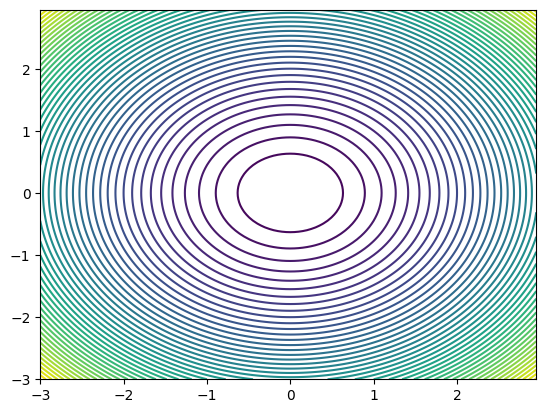

In [2]:
# Function to analyze
X = np.arange(-3, 3, 0.05)
Y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

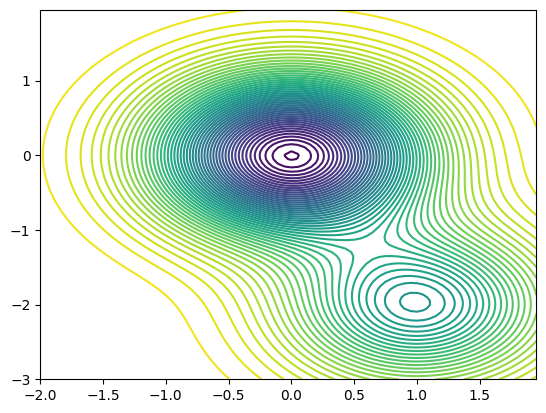

In [3]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [4]:
class SimpleGradientDescent:
    X = np.arange(-3, 3, 0.05)
    Y = np.arange(-3, 3, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        #! changed
        self.trace = np.ndarray((0, 2), np.float64)

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace)>0:

            plt.scatter(self.trace[:,0], self.trace[:,1], s=10)


    def calculate_func_vale(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        #! TODO
        grad = self.grad_func(x1, x2)
        return tuple(-1 * self.alpha * val for val in grad)

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:
        #! TODO
        x1, x2 = x1_init, x2_init

        length, width = self.trace.shape
        self.trace.resize((length + steps, width))
        np.append(self.trace, [x1, x2])

        for counter in range(steps):
            dir1, dir2 = self.gradient_descent_step(x1, x2)
            x1, x2 = x1 + dir1, x2 + dir2
            self.trace[length + counter,:] = [x1,x2]
        return self.calculate_func_vale(x1, x2)

        



In [8]:
starting_points = [(0, 0), (1, 1), (2, 2), (-1, 1), (-2, 1), (3, -2), (2, -1), (-2, -2)]

def measure_sgd(func, func_grad, s_points, steps=100, alphas=[.1]):
    results = []
    sgd = SimpleGradientDescent(func, func_grad)
    for x1, x2 in s_points:
        val = sgd.minimize(x1, x2, steps)
        results.append(val)
    sgd.plot_func()
    return results



# Funkcja 1

[0.0,
 8.299031137761999e-20,
 3.3196124551047996e-19,
 8.299031137761999e-20,
 2.0747577844404998e-19,
 5.3943702395453e-19,
 2.0747577844404998e-19,
 3.3196124551047996e-19]

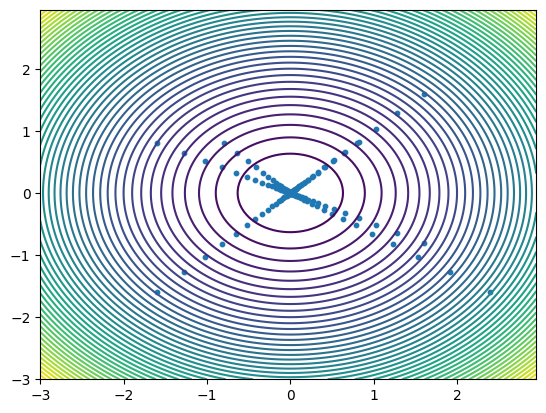

In [9]:
def f(x1: float, x2: float) -> float:
    return x1**2 + x2**2

def f_grad(x1: float, x2: float) -> Tuple[float, float]:
    return (2*x1, 2*x2)

# sgd1 = SimpleGradientDescent(f, f_grad)
# mval = sgd1.minimize(2, -.5, 50)
# print(f'Found minimum: {mval}')
# sgd1.plot_func()

res1 = measure_sgd(f, f_grad, starting_points)


# Funkcja 2

[np.float64(0.49663102650045726),
 np.float64(0.4966310265139986),
 np.float64(1.4996245080466621),
 np.float64(0.4966310265410812),
 np.float64(0.9648736042583773),
 np.float64(1.4908349457544596),
 np.float64(0.9344532374913752),
 np.float64(1.499557393169738)]

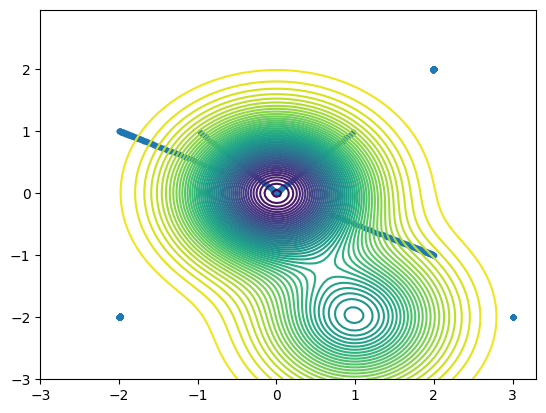

In [7]:
def g(x1: float, x2: float) -> float:
    return (
        1.5
        - np.exp(-(x1 ** (2)) - x2 ** (2))
        - 0.5 * np.exp(-((x1 - 1) ** (2)) - (x2 + 2) ** (2))
    )


def g_grad(x1: float, x2: float) -> float:
    z1 = 2 * x1 * np.exp(-x1**2 - x2**2)
    +(x1 - 1) * np.exp(-((x1 - 1) ** 2) - (x2 + 2) ** 2)

    z2 = 2 * x2 * np.exp(-x1**2 - x2**2)
    +(x2 + 2) * np.exp(-((x1 - 1) ** 2) - (x2 + 2) ** 2)

    return (z1, z2)


res2 = measure_sgd(g, g_grad, starting_points)